In [122]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams.update({
    'text.latex.preamble': r'\usepackage{amsmath}',
    'text.usetex': True,
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica']
})

In [2]:
def get_LJ_potential(P,sig=1,eps=1):
    x = P.T[0]
    y = P.T[1]
    
    X = np.tile(x,(x.shape[0],1))
    XT = X.T

    Y = np.tile(y,(y.shape[0],1))
    YT = Y.T
    
    r = np.sqrt((X - XT)**2 + (Y - YT)**2).flatten()
    r = r[r!=0]
    
    return np.sum(4*eps*((sig/r)**12 - (sig/r)**6))/2

In [14]:
P

array([[0, 0],
       [1, 0],
       [0, 1]])

In [22]:
def walk(config,h=1,freeze=None):
    step = h*(2*np.random.uniform(size=config.shape)-1)
    
    if freeze is not None:
        cond = np.tile(freeze,(2,1)).T
        step *= cond
    
    return config + step

In [145]:
def minimize(config,h=1,sig=1,eps=1,rtol=1e-10,atol=1e-10,max_iter=100,freeze=None,track=False):
    configs = [config]
    U = [get_LJ_potential(config)]
    
    for i in range(max_iter):
        new_config = walk(configs[-1],h,freeze)
        new_U = get_LJ_potential(new_config,sig,eps)
        
        if new_U < U[-1]:
            configs.append(new_config)
            U.append(new_U)
            
            # adiff = np.abs(new_U - U[-1])
            # rdiff = np.abs(adiff/U[-1])
            # if adiff < atol:
            #     print(i,'adiff',adiff)
            #     break
            # elif rdiff < rtol:
            #     print(i,'rdiff',rdiff)
            #     break
    
    if track:
        return np.array(configs),np.array(U)
    else:
        return configs[-1],U[-1]

In [148]:
def transform(P,a=np.array([0,0]),theta=0,origin=np.array([0,0])):
    R = np.array([
        [np.cos(theta),-np.sin(theta)],
        [np.sin(theta),np.cos(theta)]
    ])
    
    P_ = np.zeros(P.shape)
    for i in len(P):
        p = P[i]
        p = p + a
        p = R@(p - origin) + origin
        
        P_[i] = p
    
    return P_

In [157]:
P = np.array([
    [0,0],
    [1,0],
    [0,1],
    [1,1]
])

configs,U = minimize(P,h=0.5,max_iter=10000,track=True)

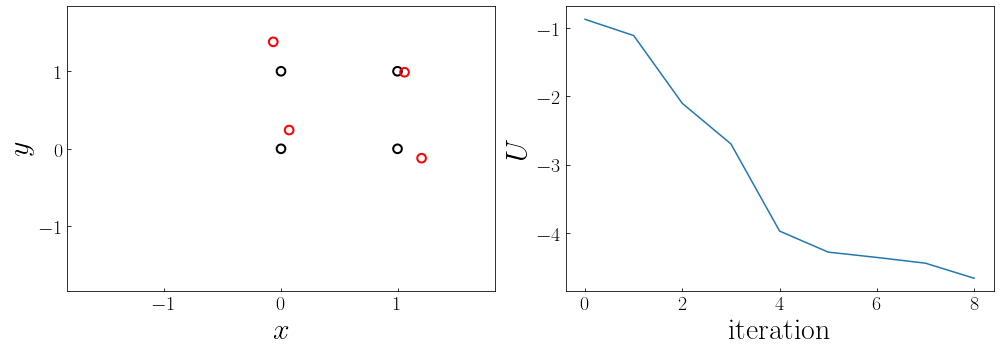

In [158]:
nrows,ncols=1,2
fig,ax=plt.subplots(nrows=nrows,ncols=ncols,figsize=(7*ncols,5*nrows))

x,y = configs[0].T
ax[0].scatter(x,y,marker='o',s=75,lw=2,color='None',edgecolor='k')

x,y = configs[-1].T
ax[0].scatter(x,y,marker='o',s=75,lw=2,color='None',edgecolor='r')

ax[0].set_xlabel(r'$x$',size=30)
ax[0].set_ylabel(r'$y$',size=30)

scale = 1.05*np.amax(np.abs(configs))
ax[0].set_xlim(-scale,scale)
ax[0].set_ylim(-scale,scale)

ax[1].plot(U)
ax[1].set_xlabel(r'$\rm iteration$',size=30)
ax[1].set_ylabel(r'$U$',size=30)

for i in range(2):
    ax[i].tick_params(axis='both',which='major',direction='in',labelsize=20)

plt.tight_layout()
plt.show()

In [87]:
U = []
x = np.linspace(1,3,100)
for i in range(len(x)):
    temp = np.array([[0,0],[x[i],0]])
    # print(temp)
    U.append(get_LJ_potential(temp))
    
U = np.array(U)

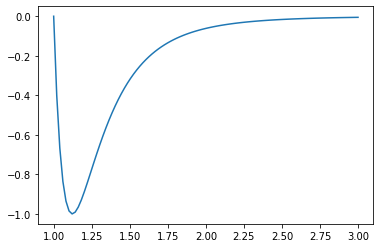

In [88]:
plt.plot(x,U)